# Main

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from datetime import datetime

import requests
from bs4 import BeautifulSoup
import re as re
import time
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Webscrapping

In [45]:
def df_source(df, name, source):
    df[name]= source
    return df

### Importing BBC webscrapping

In [2]:
import src.BBC_webscrapping as bbc

In [28]:
df_bbc_russia = bbc.keyword('Russia',200)

In [ ]:
df_bbc_china = bbc.keyword('China',200)

In [9]:
df_bbc_uk = bbc.keyword('UK',200)

In [11]:
df_bbc_us = bbc.keyword('USA',200)

In [31]:
df_bbc=pd.concat([df_bbc_russia,df_bbc_china,df_bbc_uk,df_bbc_us])

In [38]:
df_bbc.to_csv('data/raw/bbc_raw.csv',index=False) 

### Importing CNN webscrapping

In [3]:
import src.CNN_webscrapping as cnn

In [ ]:
df_cnn_russia = cnn.keyword('Russia',200)
df_cnn_china = cnn.keyword('China',200)

### Importing Peoples's  Daily Online

In [4]:
import src.peoples_webscrapping as pdo

In [ ]:
df_united_states = pdo.keyword('United States',60)
df_usa = pdo.keyword('USA',60)
df_uk = pdo.keyword('UK',60)
df_united_kingdom = pdo.keyword('United Kingdom',60)

In [ ]:
df_pd_us=pd.concat([df_united_states,df_usa])
df_pd_uk=pd.concat([df_uk,df_united_kingdom])

### Importing RT webscrapping

In [5]:
import src.RT_webscrapping as rt

In [ ]:
df_united_states = rt.keyword('United States',100)
df_usa = rt.keyword('USA',100)
df_united_kingdom = rt.keyword('United Kingdom',100)
df_uk = rt.keyword('uk',100)

In [ ]:
df_rt_us= pd.concat([df_united_states,df_usa])
df_rt_uk=pd.concat([df_united_kingdom,df_uk])

### - not required- Saving raw data into CSV 

In [ ]:
df_bbc_china.to_csv('data/raw/bbc_china.csv',index=False) 
df_bbc_russia.to_csv('data/raw/bbc_russia.csv',index=False)
df_cnn_china.to_csv('data/raw/cnn_china.csv',index=False)
df_cnn_russia.to_csv('data/raw/cnn_russia.csv',index=False)
df_pd_us.to_csv('data/raw/pdo_united_states.csv',index=False)
df_pd_uk.to_csv('data/raw/pdo_united_kingdom.csv',index=False) 
df_rt_us.to_csv('data/raw/rt_united_states.csv',index=False)  
df_rt_uk.to_csv('data/raw/rt_united_kingdom.csv',index=False)  

## Natural Languaje, Subjectivity and Polarity analysis

### Importing functions

In [2]:
import src.NLTK_analysis as nk

### - Not required - Importing raw files

In [3]:
df_bbc_china=pd.read_csv('data/raw/bbc_china.csv')
df_bbc_russia=pd.read_csv('data/raw/bbc_russia.csv')
df_cnn_china=pd.read_csv('data/raw/cnn_china.csv')
df_cnn_russia=pd.read_csv('data/raw/cnn_russia.csv')
df_pd_us=pd.read_csv('data/raw/pdo_united_states.csv')
df_pd_uk=pd.read_csv('data/raw/pdo_united_kingdom.csv')
df_rt_us=pd.read_csv('data/raw/rt_united_states.csv')
df_rt_uk=pd.read_csv('data/raw/rt_united_kingdom.csv')

### Applying to BBC

- China

In [4]:
df_bbc_china = nk.preprocess(df_bbc_china)
df_bbc_china=nk.add_column(df_bbc_china,'source','bbc')
df_bbc_china=nk.add_column(df_bbc_china,'topic','china')
df_bbc_china.sample()

,title,article,link,day,month,year,word,subjectivity,polarity,date,source,topic
114,US-China trade hits record high despite rising...,ReadsBusinessMarket DataNew EconomyNew Tech Ec...,https://www.bbc.co.uk/news/business-64563855,8,2,2023,"[china, trade, bn, balloon, high, rising, hit,...",0.317309,0.06855,8/2/2023,bbc,china


- Russia

In [5]:
df_bbc_russia = nk.preprocess(df_bbc_russia)
df_bbc_russia=nk.add_column(df_bbc_russia,'source','bbc')
df_bbc_russia=nk.add_column(df_bbc_russia,'topic','russia')
df_bbc_russia.sample()

,title,article,link,day,month,year,word,subjectivity,polarity,date,source,topic
71,Ukraine war: Russian air strikes cut power at ...,Ukraine war: Russian air strikes cut power at ...,https://www.bbc.co.uk/news/world-europe-64897888,9,3,2023,"[ukraine, russia, power, attacks, hit, city, w...",0.272365,-0.007555,9/3/2023,bbc,russia


### Applying to CNN

- China

In [6]:
df_cnn_china = nk.preprocess(df_cnn_china)
df_cnn_china=nk.add_column(df_cnn_china,'source','cnn')
df_cnn_china=nk.add_column(df_cnn_china,'topic','china')
df_cnn_china.sample()

,title,article,link,day,month,year,word,subjectivity,polarity,date,source,topic
51,"5 things to know for March 7: Winter snow, Jan...","5 things to know for March 7: Winter snow, Ja...",https://www.cnn.com/2023/03/07/us/five-things-...,7,3,2023,"[china, snow, january, twitter, things, winter...",0.376999,0.106413,7/3/2023,cnn,china


- Russia

In [7]:
df_cnn_russia = nk.preprocess(df_cnn_russia)
df_cnn_russia=nk.add_column(df_cnn_russia,'source','cnn')
df_cnn_russia=nk.add_column(df_cnn_russia,'topic','russia')
df_cnn_russia.sample()

,title,article,link,day,month,year,word,subjectivity,polarity,date,source,topic
20,"Russia could weaponize metal exports next, Cit...","Russia could weaponize metal exports next, Ci...",https://www.cnn.com/2023/03/09/business/russia...,9,3,2023,"[russia, business, jones, markets, bank, dow, ...",0.385321,0.068052,9/3/2023,cnn,russia


### Applying to People's Daily Online

- United States of America

In [8]:
df_pd_us = nk.preprocess(df_pd_us)
df_pd_us=nk.add_column(df_pd_us,'source','pdo')
df_pd_us=nk.add_column(df_pd_us,'topic','usa')
df_pd_us.sample()

,title,article,link,day,month,year,word,subjectivity,polarity,date,source,topic
122,"China, US chart a path forward for bilateral t...","China, US chart a path forward for bilateral t...",http://english.people.com.cn/n3/2022/1116/c900...,16,11,2022,"[china, bilateral, meeting, relations, preside...",0.343504,0.104255,16/11/2022,pdo,usa


- United Kingdom

In [9]:
df_pd_uk = nk.preprocess(df_pd_uk)
df_pd_uk=nk.add_column(df_pd_uk,'source','pdo')
df_pd_uk=nk.add_column(df_pd_uk,'topic','uk')
df_pd_uk.sample()

,title,article,link,day,month,year,word,subjectivity,polarity,date,source,topic
75,Sci-tech serves nation's strategic needs - Peo...,Sci-tech serves nation´s strategic needsBy Zha...,http://english.people.com.cn/n3/2023/0103/c900...,3,1,2023,"[china, innovation, science, technology, globa...",0.383243,0.103544,3/1/2023,pdo,uk


### Applying to RT

- United States of America

In [10]:
df_rt_us = nk.preprocess(df_rt_us)
df_rt_us=nk.add_column(df_rt_us,'source','rt')
df_rt_us=nk.add_column(df_rt_us,'topic','usa')
df_rt_us.sample()

,title,article,link,year,month,day,word,subjectivity,polarity,date,source,topic
66,China is competing in a great Asian arms race ...,China is competing in a great Asian ar...,https://www.rt.com/news/572539-china-asia-arms...,2023,3,9,"[china, military, beijing, budget, region, mil...",0.366586,0.097283,9/3/2023,rt,usa


- United Kingdom

In [11]:
df_rt_uk = nk.preprocess(df_rt_uk)
df_rt_uk=nk.add_column(df_rt_uk,'source','rt')
df_rt_uk=nk.add_column(df_rt_uk,'topic','uk')
df_rt_uk.sample()

,title,article,link,year,month,day,word,subjectivity,polarity,date,source,topic
100,Assange supporters surround UK Parliament — RT...,Assange supporters surround UK Parliam...,https://www.rt.com/news/564347-assange-rally-u...,2022,10,9,"[assange, extradition, julian, wikileaks, parl...",0.384195,0.099425,9/10/2022,rt,uk


### Saving all the DF's in one for visualisation

In [12]:
df_together = pd.concat([df_bbc_china,df_bbc_russia,df_cnn_china,df_cnn_russia,df_pd_us,df_pd_uk,df_rt_us, df_rt_uk])
df_together.to_csv('data/dfcomplete.csv',index=False)

### wordcloud

In [13]:
import src.wordcloud as wc

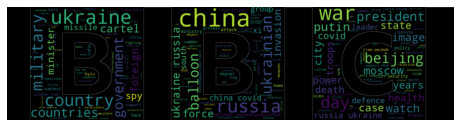

In [14]:
df_bbc=pd.concat([df_bbc_russia,df_bbc_china])
bbc_pic=wc.wordcloud(df_bbc,'uk.png')

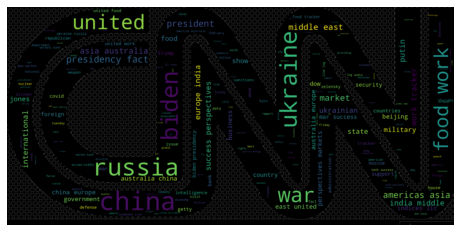

In [15]:
df_cnn=pd.concat([df_cnn_russia,df_cnn_china])
wc.wordcloud(df_cnn,'usa.png')

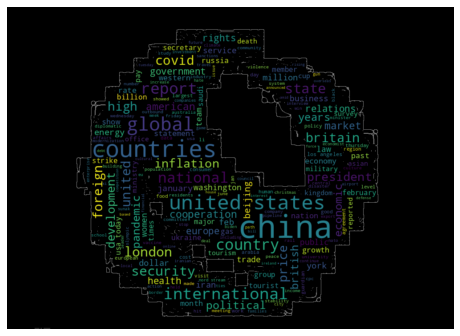

In [16]:
df_pd=pd.concat([df_pd_uk,df_pd_us])
wc.wordcloud(df_pd,'china.png')

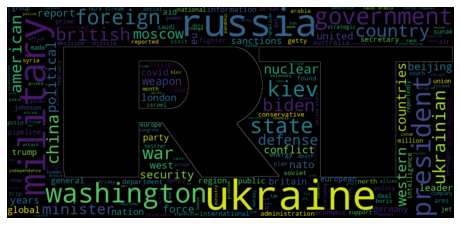

In [17]:
df_rt=pd.concat([df_rt_uk,df_rt_us])
wc.wordcloud(df_rt,'russia.png')

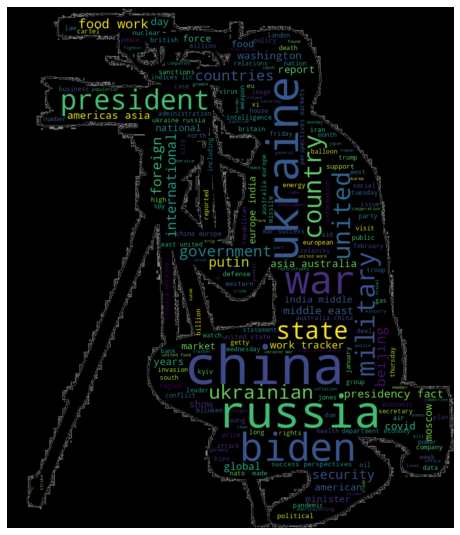

In [18]:
wc.wordcloud(df_together,'press.png')

### Create DF to save a list of most common words used by western and eastern for visualisation

In [19]:
df_words = nk.list_words(df_together)
df_west_words= pd.concat([nk.list_words(df_bbc),nk.list_words(df_cnn)])
df_east_words= pd.concat([nk.list_words(df_pd), nk.list_words(df_rt)])

In [20]:
df_words.to_csv ('data/words.csv',index=False)
df_west_words.to_csv('data/west_words.csv',index=False)
df_east_words.to_csv('data/east_words.csv',index=False)